In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%config IPCompleter.greedy=True

In [2]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
x = data[['X_1', 'X_2']]

In [5]:
y = data['Y']

In [6]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

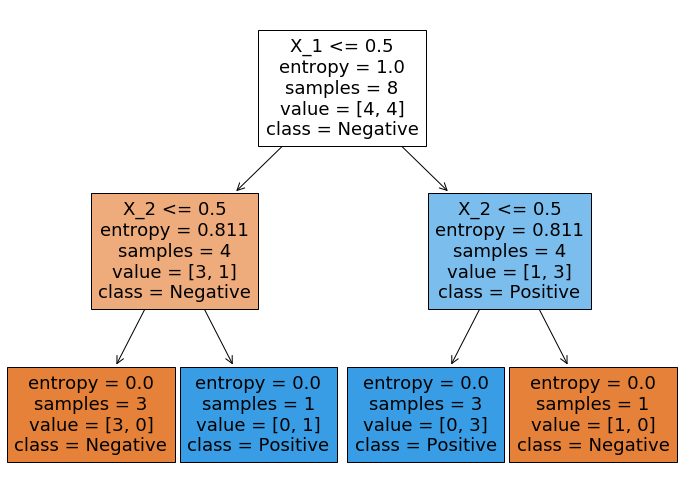

In [9]:
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
tree.plot_tree(clf, feature_names=list(x), class_names=['Negative', 'Positive'], filled=True);

In [10]:
data = pd.read_csv('./resources/cats.csv', index_col=0)

In [11]:
data

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [24]:
import math
def entropy(list_prob):
    return sum(-p * math.log(p, 2) for p in list_prob if p)

In [15]:
def get_entropy(column):
    query_d = data['Вид'] == 'собачка'
    query_0 = data[column] == 0
    query_1 = data[column] == 1
    p0 = data[(query_0) & (query_d)].index.nunique()/ data[query_0].index.nunique()
    p1 = data[(query_1) & (query_d)].index.nunique()/ data[query_1].index.nunique()
    return [round(x, 2) for x in [entropy([e, 1 - e]) for e in (p0, p1)]]

In [16]:
for column in data.columns[0:3]:
    print(column, get_entropy(column))

Шерстист [0.0, 0.99]
Гавкает [0.0, 0.72]
Лазает по деревьям [0.0, 0.0]


In [21]:
e_y = entropy([p_d, 1 - p_d])

In [31]:
def get_ig(column):
    query_d = data['Вид'] == 'собачка'
    query_0 = data[column] == 0
    query_1 = data[column] == 1
    count_all = data.index.nunique()
    count_0 = data[query_0].index.nunique()
    count_1 = data[query_1].index.nunique()
    p0 = data[(query_0) & (query_d)].index.nunique()/ count_0
    p1 = data[(query_1) & (query_d)].index.nunique()/ count_1
    return sum([entropy([x, 1 - x]) * y for x, y in ((p0, count_0/count_all), (p1, count_1/count_all))])

In [34]:
for column in data.columns[0:3]:
    print(column, round(e_y - get_ig(column), 2))

Шерстист 0.08
Гавкает 0.61
Лазает по деревьям 0.97
